In [78]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import random
from scipy import stats
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [79]:
# Find the current working directory and the datasets directory.
current_working_directory = os.getcwd()

dataset_directory = current_working_directory + "\DataSets"

In [80]:
# Load my csv data to a data frame.
bank_data_df = pd.read_csv(dataset_directory + '\\bank-additional-full.csv', sep = ";")
bank_data_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# Data Understanding

### Missing Values

In [81]:
bank_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [82]:
# A list with every column name
column_name_list = list(bank_data_df.columns)

number_of_missing_values_list = []

def get_number_of_missing_values(column_name):
    result = bank_data_df[column_name].value_counts()
    if ('unknown' in result):
        number_of_missing_values_list.append(result['unknown'])
    else:
        number_of_missing_values_list.append(0)

In [83]:
for column_name in column_name_list:
    get_number_of_missing_values(column_name)

number_of_missing_values_dict = {
    'Column name': column_name_list,
    '# of missing values': number_of_missing_values_list
}

In [84]:
# creating a Dataframe object 
missing_values_df = pd.DataFrame(number_of_missing_values_dict)
missing_values_df

,Column name,# of missing values
0,age,0
1,job,330
2,marital,80
3,education,1731
4,default,8597
5,housing,990
6,loan,990
7,contact,0
8,month,0
9,day_of_week,0


In our data, missing values is the value "unknown" in the categorical attributes, so job has 330 missing values, marital has 1731, default has 8597, housing has 990 and loan has 990.as they are shown in the screenshot below:

### Outliers

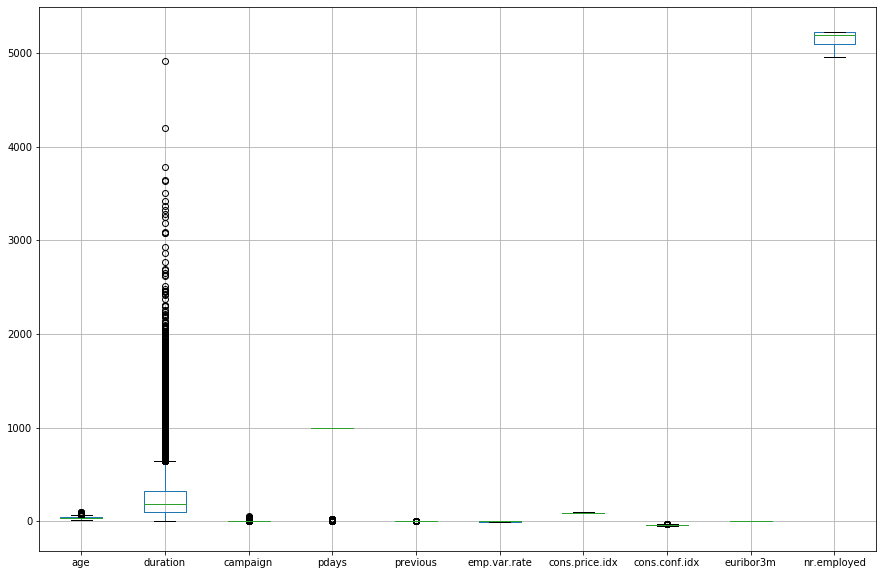

In [85]:
boxplot = bank_data_df.boxplot(grid = True, figsize = (15, 10))

We have 10 numerical attributes so we are going to examine only those.

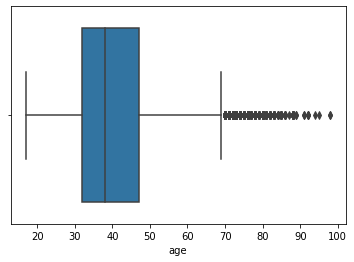

In [86]:
ax = sns.boxplot(x = bank_data_df["age"])

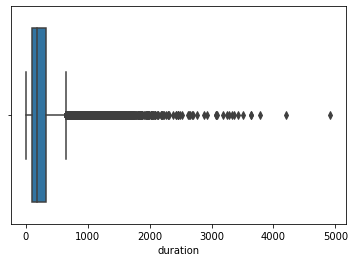

In [87]:
ax = sns.boxplot(x = bank_data_df["duration"])

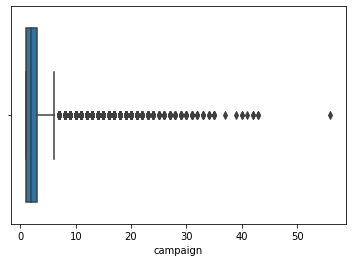

In [88]:
ax = sns.boxplot(x = bank_data_df["campaign"])

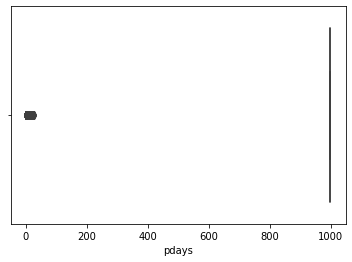

In [89]:
ax = sns.boxplot(x = bank_data_df["pdays"])

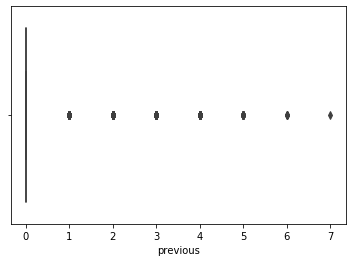

In [90]:
ax = sns.boxplot(x = bank_data_df["previous"])

We can point out that the attributes age,duration, previous and campaign have the most outliers in the dataset.

# Data Preprocessing

Convert the column 'y' from categorical to numeric because it will help me in the future.
1 is 'yes and 0 is 'no'

In [91]:
bank_data_df['y'].replace(['yes', 'no'], [1, 0], inplace = True)
bank_data_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


For the missing values we are going to use 2 techniques. When the most frequent word has by far more data points we, are going to replace the missing values with the most frequent one. Otherwise we are going to replace the missing values with a random value.

In [92]:
bank_data_df["job"].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [93]:
bank_data_df["marital"].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [94]:
bank_data_df["education"].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [95]:
bank_data_df["default"].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [96]:
bank_data_df["housing"].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [97]:
bank_data_df["loan"].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

Based on the above, for the job, education and housing attributes we are going to use the second technique and the first technique for the other attributes.

In [98]:
collumn_names_missing_values_list = ["marital", "default", "loan"]

# A function that for every attribute, it replaces every unknown value with the most frequent one. 
def replace_missing_values(collumn_name):
    result_a = bank_data_df[collumn_name].value_counts()
    most_frequent_value = result_a.index[0]
    bank_data_df[collumn_name].replace("unknown", most_frequent_value, inplace = True)

for current_collumn_name in collumn_names_missing_values_list:
    replace_missing_values(current_collumn_name)


In [99]:
bank_data_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


Replace the unknown values of attributes job, education and housing with a random values.

In [100]:
def replace_missing_values_with_random_ones(attribute_name):
    attribute_unique_values_list = bank_data_df[attribute_name].unique().tolist() # Create a list that has all the unique values of the attribute
    attribute_unique_values_list.remove("unknown") # Remove the value unknown from the list
    random_value = random.choice(attribute_unique_values_list) # Pick a random value from the list
    print("Random Value: ", random_value)
    bank_data_df[attribute_name].replace("unknown", random_value, inplace = True)

In [101]:
replace_missing_values_with_random_ones("job")

Random Value:  self-employed


In [102]:
replace_missing_values_with_random_ones("education")

Random Value:  basic.4y


In [103]:
replace_missing_values_with_random_ones("housing")

Random Value:  yes


In [104]:
bank_data_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


# Exploratory Data Analysis (EDA)

In [105]:
bank_data_df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
dtype: object

First we are going to examine the pearson correlation coefficient between the attributes. 
<p>The Pearson Correlation measures the linear dependence between two variables X and Y.</p>
<p>The resulting coefficient is a value between -1 and 1 inclusive, where:</p>
<ul>
    <li><b>1</b>: Perfect positive linear correlation.</li>
    <li><b>0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Perfect negative linear correlation.</li>
</ul>

The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the

<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>

<p>We are interested in the correlation between the attribute <b>y</b> and the other attributes. </p>

In [106]:
bank_data_df.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,0.405274
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,-0.324914
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.230181
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,0.054878
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,-0.307771
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,-0.354678


Let's examine the correlation between duration and y.

In [107]:
pearson_corr, p_value = stats.pearsonr(bank_data_df["duration"], bank_data_df["y"])
print("Pearson Correlation: ", pearson_corr)
print("P-value: ", p_value)

Pearson Correlation:  0.40527380067931484
P-value:  0.0


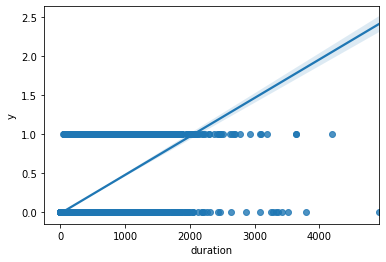

In [108]:
ax = sns.regplot(x = "duration", y = "y", data = bank_data_df)

We can clearly see that there is no correlation between the attributes.

### Relationship between age and y

In [109]:
bank_data_df["age"].describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

In [110]:
# create a list of our conditions
conditions = [
    (bank_data_df["age"] <= 19),
    (bank_data_df["age"] >= 20) & (bank_data_df["age"] <= 29),
    (bank_data_df["age"] >= 30) & (bank_data_df["age"] <= 39),
    (bank_data_df["age"] >= 40) & (bank_data_df["age"] <= 49),
    (bank_data_df["age"] >= 50) & (bank_data_df["age"] <= 59),
    (bank_data_df["age"] >= 60) & (bank_data_df["age"] <= 69),
    (bank_data_df["age"] >= 70) & (bank_data_df["age"] <= 79),
    (bank_data_df["age"] >= 80) & (bank_data_df["age"] <= 89),
    (bank_data_df["age"] >= 90) & (bank_data_df["age"] <= 99),
    ]

# create a list of the values we want to assign for each condition
values = ["10's", "20's", "30's", "40's", "50's", "60's", "70's", "80's", "90's"]

# create a new column and use np.select to assign values to it using our lists as arguments
bank_data_df['age range'] = np.select(conditions, values)

# display updated DataFrame
bank_data_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age range
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,50's
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,50's
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,30's
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,40's
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,50's
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1,70's
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,40's
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,50's
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1,40's


In [111]:
def create_eda_df(attribute_name):
    attribute_groups = bank_data_df.groupby(attribute_name)
    attribute_names_list = []
    yes_values_list = []
    no_values_list = []
    
    for current_attribute_name, current_attribute_df in attribute_groups:
        current_y_groups = current_attribute_df.groupby('y')
        current_yes_value = current_y_groups.get_group(1).shape[0]
        current_no_value = current_y_groups.get_group(0).shape[0]

        attribute_names_list.append(current_attribute_name)
        yes_values_list.append(current_yes_value)
        no_values_list.append(current_no_value)

    attribute_dict = {
        attribute_name: attribute_names_list,
        "yes": yes_values_list,
        "no": no_values_list
    }

    attribute_df = pd.DataFrame(attribute_dict, index = attribute_names_list)
    return attribute_df

In [112]:
age_range_df = create_eda_df("age range")
age_range_df

,age range,yes,no
10's,10's,34,41
20's,20's,888,4706
30's,30's,1715,15223
40's,40's,834,9692
50's,50's,697,6165
60's,60's,251,473
70's,70's,144,175
80's,80's,72,68
90's,90's,5,5


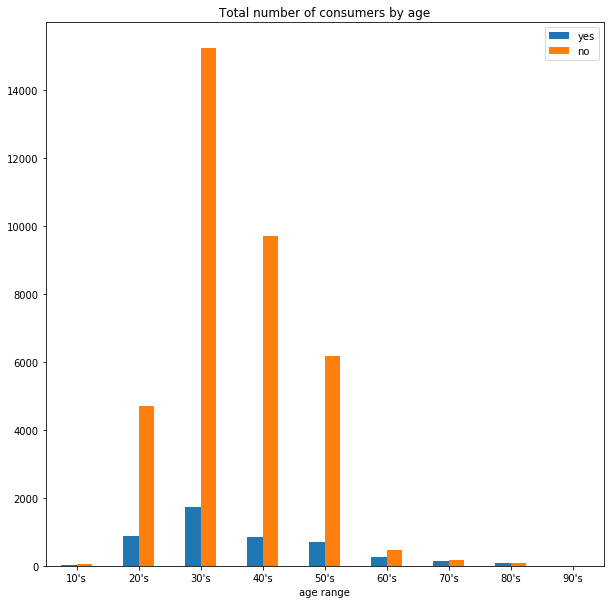

In [113]:
ax = age_range_df.plot.bar(x = "age range", rot = 0, figsize = (10, 10), title = "Total number of consumers by age")

From the bar chart above we can see that:
- For the ages 20 to 60, there is a significant difference between those who applied and those who did not
- At every age, those who did not apply far outnumbered those who did

### Relationship between job and y

In [114]:
job_df = create_eda_df("job")
job_df

,job,yes,no
admin.,admin.,1352,9070
blue-collar,blue-collar,638,8616
entrepreneur,entrepreneur,124,1332
housemaid,housemaid,106,954
management,management,328,2596
retired,retired,434,1286
self-employed,self-employed,186,1565
services,services,323,3646
student,student,275,600
technician,technician,730,6013


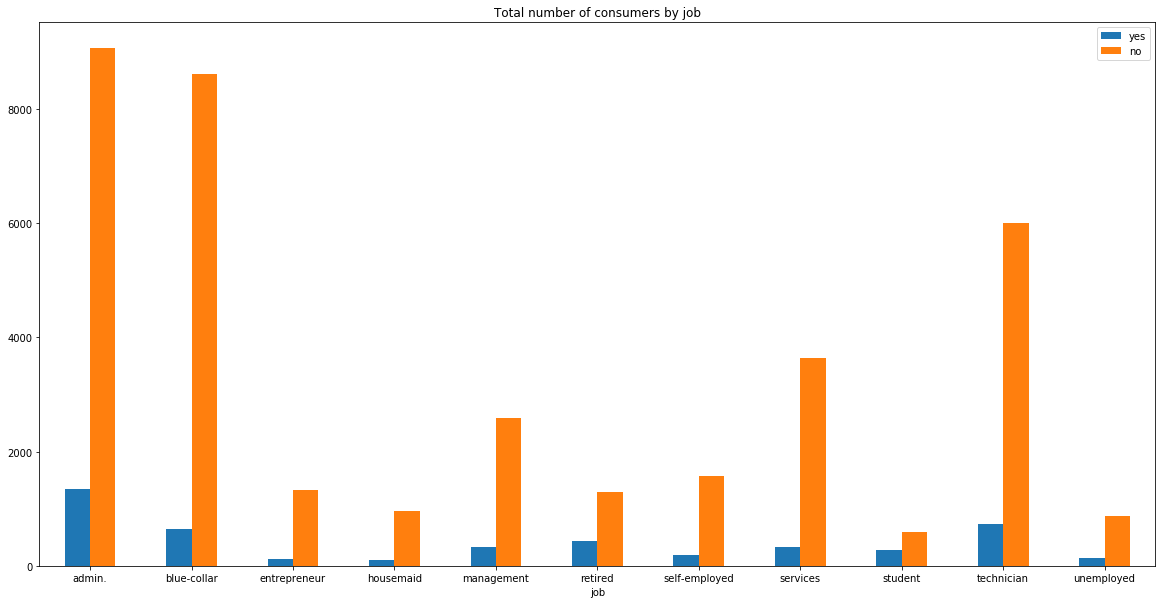

In [115]:
ax = job_df.plot.bar(x = "job", rot = 0, figsize = (20, 10), title = "Total number of consumers by job")

From the bar chart above we can see that:
- admin, blu-collar and technician have the highest number of consumers.
- At every job, those who did not apply far outnumbered those who did

### Relationship between education and y

In [116]:
education_df = create_eda_df("education")
education_df

,education,yes,no
basic.4y,basic.4y,679,5228
basic.6y,basic.6y,188,2104
basic.9y,basic.9y,473,5572
high.school,high.school,1031,8484
illiterate,illiterate,4,14
professional.course,professional.course,595,4648
university.degree,university.degree,1670,10498


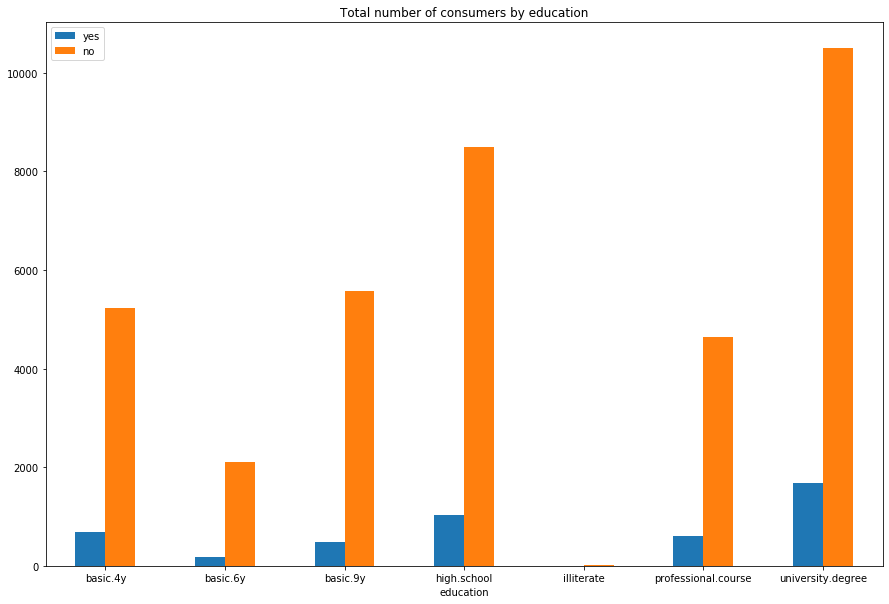

In [117]:
ax = education_df.plot.bar(x = "education", rot = 0, figsize = (15, 10), title = "Total number of consumers by education")

From the bar chart above we can see that:
- university degree has the highest number of consumers in both categories.
- At every education, those who did not apply far outnumbered those who did

### Relationship between poutcome and y

In [118]:
poutcome_df = create_eda_df("poutcome")
poutcome_df

,poutcome,yes,no
failure,failure,605,3647
nonexistent,nonexistent,3141,32422
success,success,894,479


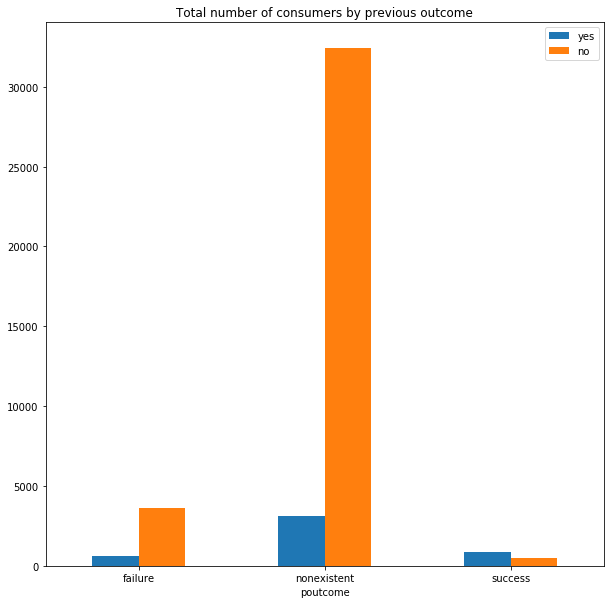

In [119]:
ax = poutcome_df.plot.bar(x = "poutcome", rot = 0, figsize = (10, 10), title = "Total number of consumers by previous outcome")

From the bar chart above we can see that:
- nonexistent poutcome has the highest number of consumers in both categories.
- Those who have previous campaign and it was succesfull they subscribe in a term deposit.

### Relationship between month and y

In [120]:
month_df = create_eda_df("month")
month_df

,month,yes,no
apr,apr,539,2093
aug,aug,655,5523
dec,dec,89,93
jul,jul,649,6525
jun,jun,559,4759
mar,mar,276,270
may,may,886,12883
nov,nov,416,3685
oct,oct,315,403
sep,sep,256,314


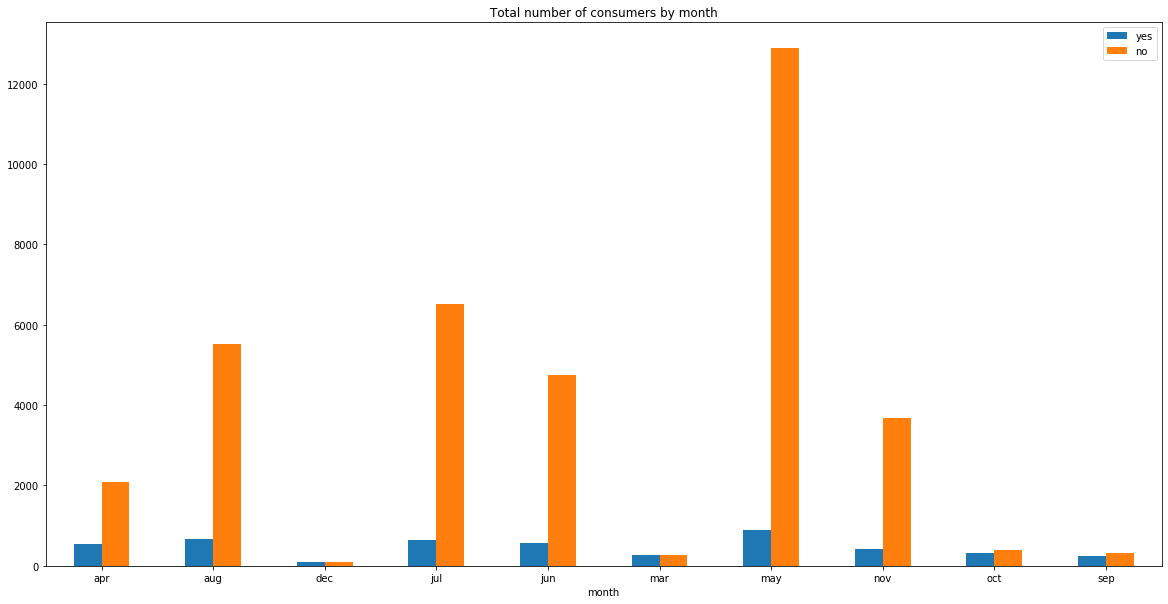

In [121]:
ax = month_df.plot.bar(x = "month", rot = 0, figsize = (20, 10), title = "Total number of consumers by month")

From the bar chart above we can see that:

- In May we have the most contacts in both cases.
- Generally, months in summer have the most contacts in both cases.
- In December, March, October and September we have small diffrences between those 2 cases

<b>The EDA showed that age, duration, month and poutcome may have important role for the bank to sell his term deposit to the customers.</b>

# Model Selection and Model Building

### Convert categorical attributes to numeric

In [122]:
# Delete the column age range that I previously created for the EDA.
bank_data_df.drop(columns = ['age range'], inplace = True)
bank_data_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [123]:
bank_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

<b>We can point out that in our data, we have 10 categorical attributes. In order to create and train a model, our data must be numeric. So, we are going to convert our categorical attributes to numeric.</b>

In [124]:
# Get all categorical columns
categorical_columns = bank_data_df.select_dtypes(['object']).columns

#convert all categorical columns to numeric
bank_data_df[categorical_columns] = bank_data_df[categorical_columns].apply(lambda x: pd.factorize(x)[0])

In [125]:
bank_data_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,0,0,0,0,0,0,0,0,0,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,1,0,1,0,0,0,0,0,0,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,1,0,1,0,1,0,0,0,0,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,2,0,2,0,0,0,0,0,0,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,1,0,1,0,0,1,0,0,0,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,0,4,0,1,0,1,5,4,...,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,3,0,4,0,0,0,1,5,4,...,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,0,5,0,1,0,1,5,4,...,2,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,4,0,4,0,0,0,1,5,4,...,1,999,0,0,-1.1,94.767,-50.8,1.028,4963.6,1


### Metrics to evaluate the model

#### Accuracy
- Accuracy is the ratio of the number of correct predictions to the total number of predictions made for a dataset
- Works well, only if there are equal number of samples belonging to each class (balanced data)

#### Precision
- Which proportion of positive identificators was actually correct (eas actually positive)
- It is a good measure to determine, when the cost of false positive is high

#### Recall
- Which proportion of actual positives, was identified correctly

#### F1-Score
- Tells you how precise(how many instances it classifies correctly) and robust(it does not miss a significant number of instances) your model is
- Works well on uneven class distribution (unbalanced data)
- The higher, the better

In [126]:
bank_data_df['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

<b>We can see that our data are unbalanced. We have 36548 observations of zero category and 4640 observations of the other category. So, maybe f1-score is a more valid metric for this dataset.</b>

## Machine Learning Algorithms

In [127]:
data = bank_data_df.drop(columns = ['y'])
targets = bank_data_df['y'] # Actual labels of our data.

In [128]:
k_fold_cv_object = KFold(n_splits = 10) # K fold cross validation with 10 folds.

For every machine learning model: <br>
&ensp; Split data into folds <br>
&ensp; For every folder: <br>
&emsp; &emsp; 1 folder for test <br>
&emsp; &emsp; 9 folders for training <br>
&emsp; &emsp; train the model <br>
&emsp; &emsp; test the model and get the predicted labels <br>
&emsp; &emsp; compute current accuracy, f1-score, precision and recall <br>
&ensp; Accuracy of the model is the average value of all the accuracies. Likewise for the rest metrics.

### Logistic Regression

- <b>Logistic regression is a classification algorithm used to assign observations to a discrete set of classes.</b>
- <b>Logistic Regression uses a more complex cost function, the 'Sigmoid function' or also known as the 'logistic function'.</b> 
- <b>The function maps any real value into another value between 0 and 1. In machine learning, we use sigmoid to map predictions to probabilities.</b>

In [129]:
accuracy_list = []
f1_score_list = []
recall_list = []
precision_list = []

logistic_regression_model = LogisticRegression(random_state = 0) # Create model.
for train_index, test_index in k_fold_cv_object.split(data):
    
    # Create train and test sets.
    data_train, data_test = data[train_index[0]:train_index[-1]], data[test_index[0]:test_index[-1]]
    targets_train, targets_test = targets[train_index[0]:train_index[-1]], targets[test_index[0]:test_index[-1]]
    
    # Train and test model.
    logistic_regression_model.fit(data_train, targets_train) # Train model.
    predicted_targets = logistic_regression_model.predict(data_test) # Test model.
    
    # Compute accuracy, f1-score, recall and precision.
    accuracy_list.append(accuracy_score(targets_test, predicted_targets))
    f1_score_list.append(f1_score(targets_test, predicted_targets, average = 'macro'))
    recall_list.append(recall_score(targets_test, predicted_targets, average = 'macro'))
    precision_list.append(precision_score(targets_test, predicted_targets, average = 'macro'))
    
# Convert lists to numpy arrays.
accuracy_np = np.array(accuracy_list)
f1_score_np = np.array(f1_score_list)
recall_np = np.array(recall_list)
precision_np = np.array(precision_list)   

# Compute mean value from every metric.
logistic_regression_accuracy = np.mean(accuracy_np)
logistic_regression_f1_score = np.mean(f1_score_np)
logistic_regression_recall = np.mean(recall_np)
logistic_regression_precision = np.mean(precision_np)

## Random Forest Classifier

<b>Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction.</b>

In [130]:
accuracy_list = []
f1_score_list = []
recall_list = []
precision_list = []

random_forest_model = RandomForestClassifier(random_state = 0) # Create model.
for train_index, test_index in k_fold_cv_object.split(data):
    
    # Create train and test sets.
    data_train, data_test = data[train_index[0]:train_index[-1]], data[test_index[0]:test_index[-1]]
    targets_train, targets_test = targets[train_index[0]:train_index[-1]], targets[test_index[0]:test_index[-1]]
    
    # Train and test model.
    random_forest_model.fit(data_train, targets_train) # Train model.
    predicted_targets = random_forest_model.predict(data_test) # Test model.
    
    # Compute accuracy, f1-score, recall and precision.
    accuracy_list.append(accuracy_score(targets_test, predicted_targets))
    f1_score_list.append(f1_score(targets_test, predicted_targets, average = 'macro'))
    recall_list.append(recall_score(targets_test, predicted_targets, average = 'macro'))
    precision_list.append(precision_score(targets_test, predicted_targets, average = 'macro'))
    
# Convert lists to numpy arrays.
accuracy_np = np.array(accuracy_list)
f1_score_np = np.array(f1_score_list)
recall_np = np.array(recall_list)
precision_np = np.array(precision_list)   

# Compute mean value from every metric.
random_forest_accuracy = np.mean(accuracy_np)
random_forest_f1_score = np.mean(f1_score_np)
random_forest_recall = np.mean(recall_np)
random_forest_precision = np.mean(precision_np)

## XGBClassifier

In [131]:
accuracy_list = []
f1_score_list = []
recall_list = []
precision_list = []

xgb_classifier_model = XGBClassifier(random_state = 0, verbosity = 0, eval_metric = 'mlogloss') # Create model.
for train_index, test_index in k_fold_cv_object.split(data):
    
    # Create train and test sets.
    data_train, data_test = data[train_index[0]:train_index[-1]], data[test_index[0]:test_index[-1]]
    targets_train, targets_test = targets[train_index[0]:train_index[-1]], targets[test_index[0]:test_index[-1]]
    
    # Train and test model.
    xgb_classifier_model.fit(data_train, targets_train) # Train model.
    predicted_targets = xgb_classifier_model.predict(data_test) # Test model.
    
    # Compute accuracy, f1-score, recall and precision.
    accuracy_list.append(accuracy_score(targets_test, predicted_targets))
    f1_score_list.append(f1_score(targets_test, predicted_targets, average = 'macro'))
    recall_list.append(recall_score(targets_test, predicted_targets, average = 'macro'))
    precision_list.append(precision_score(targets_test, predicted_targets, average = 'macro'))
    
# Convert lists to numpy arrays.
accuracy_np = np.array(accuracy_list)
f1_score_np = np.array(f1_score_list)
recall_np = np.array(recall_list)
precision_np = np.array(precision_list)   

# Compute mean value from every metric.
xgb_classifier_accuracy = np.mean(accuracy_np)
xgb_classifier_f1_score = np.mean(f1_score_np)
xgb_classifier_recall = np.mean(recall_np)
xgb_classifier_precision = np.mean(precision_np)

<b> Create a data frame with the results of every model <b/>

In [132]:
# dictionary with list object in values
results_dict = {
    'Logistic Regression' : [logistic_regression_accuracy, logistic_regression_f1_score, logistic_regression_recall, logistic_regression_precision],
    'Random Forest Classifier' : [random_forest_accuracy, random_forest_f1_score, random_forest_recall, random_forest_precision],
    'XGB Classifier' : [xgb_classifier_accuracy, xgb_classifier_f1_score, xgb_classifier_recall, xgb_classifier_precision]
}
  
# creating a Dataframe object from dictionary 
results_df = pd.DataFrame(results_dict, index = ['Accuracy', 'F1-Score', 'Recall', 'Precision'])

results_df

,Logistic Regression,Random Forest Classifier,XGB Classifier
Accuracy,0.903194,0.960530,0.926725
F1-Score,0.646856,0.925535,0.794130
Recall,0.617951,0.924063,0.759743
Precision,0.751228,0.937497,0.854115


### Based on the above we can point out that the Random Forest Classifier has the best performance on our dataset.

# Feature Importance

- Now that we find out that Random Forest Classifier has the best performance in our data set, we are going to find the most important features in our dataset. From our EDA, we ended up that age, duration, month and poutcome may have important role in our model. Now, we are going to use feature importance.
- Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.
- Feature importance is an inbuilt class that comes with Tree Based Classifiers. We will be using Extra Tree Classifier for extracting the top 10 features for the dataset.

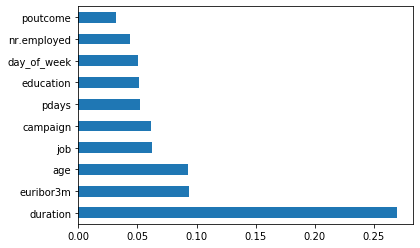

In [133]:
feature_importance_model = ExtraTreesClassifier()
feature_importance_model.fit(data, targets)

#Plot graph of feature importances for better visualization
feat_importances = pd.Series(feature_importance_model.feature_importances_, index = data.columns)
feat_importances.nlargest(10).plot(kind = 'barh')
plt.show()

<b>As we can see, the most important featutes are duration, euribor3m, age, job, campaign, pdays, education, day_of_week, nr.employed and poutcome. So we are going to train and test our Random Forest Classifier only using these attributes.</b>

In [140]:
final_data = bank_data_df[['duration', 'euribor3m', 'age', 'job', 'campaign', 'pdays', 'education', 'day_of_week', 'nr.employed', 'poutcome']]
final_targets = bank_data_df['y'] # Actual labels of our data.

In [141]:
final_data

,duration,euribor3m,age,job,campaign,pdays,education,day_of_week,nr.employed,poutcome
0,261,4.857,56,0,1,999,0,0,5191.0,0
1,149,4.857,57,1,1,999,1,0,5191.0,0
2,226,4.857,37,1,1,999,1,0,5191.0,0
3,151,4.857,40,2,1,999,2,0,5191.0,0
4,307,4.857,56,1,1,999,1,0,5191.0,0
...,...,...,...,...,...,...,...,...,...,...
41183,334,1.028,73,5,1,999,4,4,4963.6,0
41184,383,1.028,46,3,1,999,4,4,4963.6,0
41185,189,1.028,56,5,2,999,5,4,4963.6,0
41186,442,1.028,44,4,1,999,4,4,4963.6,0


In [142]:
accuracy_list = []
f1_score_list = []
recall_list = []
precision_list = []

final_model = RandomForestClassifier(random_state = 0) # Create model.
for train_index, test_index in k_fold_cv_object.split(final_data):
    
    # Create train and test sets.
    data_train, data_test = final_data[train_index[0]:train_index[-1]], final_data[test_index[0]:test_index[-1]]
    targets_train, targets_test = final_targets[train_index[0]:train_index[-1]], final_targets[test_index[0]:test_index[-1]]
    
    # Train and test model.
    final_model.fit(data_train, targets_train) # Train model.
    predicted_targets = final_model.predict(data_test) # Test model.
    
    # Compute accuracy, f1-score, recall and precision.
    accuracy_list.append(accuracy_score(targets_test, predicted_targets))
    f1_score_list.append(f1_score(targets_test, predicted_targets, average = 'macro'))
    recall_list.append(recall_score(targets_test, predicted_targets, average = 'macro'))
    precision_list.append(precision_score(targets_test, predicted_targets, average = 'macro'))
    
# Convert lists to numpy arrays.
accuracy_np = np.array(accuracy_list)
f1_score_np = np.array(f1_score_list)
recall_np = np.array(recall_list)
precision_np = np.array(precision_list)   

# Compute mean value from every metric.
final_accuracy = np.mean(accuracy_np)
final_f1_score = np.mean(f1_score_np)
final_recall = np.mean(recall_np)
final_precision = np.mean(precision_np)

In [143]:
# dictionary with list object in values
final_results_dict = {
    'Random Forest Classifier' : [final_accuracy, final_f1_score, final_recall, final_precision],
}
  
# creating a Dataframe object from dictionary 
final_results_df = pd.DataFrame(final_results_dict, index = ['Accuracy', 'F1-Score', 'Recall', 'Precision'])

final_results_df

,Random Forest Classifier
Accuracy,0.964781
F1-Score,0.934930
Recall,0.932654
Precision,0.939855


#### There is a slightly increase in our results  after the feature importance process.

# Nevertheless, it has provided us satisfactory results. Random Forest Classifier is a good model for the bank to try and reach out to new customers.